In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
X = torch.linspace(0, 1, 10).view((-1, 1))

print(X)

true_slope = 0.5
true_intercept = 1

y = true_slope * X + true_intercept * torch.rand(X.size())
y = y.view((1, len(y)))

print(f"y: {y}")

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])
y: tensor([[0.4743, 1.0478, 0.6933, 0.7952, 0.5664, 1.2644, 0.8903, 0.6990, 0.7652,
         1.0039]])


In [3]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1) # h0 = w0 + w1x
        
    def forward(self, x):
        x = self.linear(x)
        return x
    
model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

number_of_epochs = 100
losses = []

for epoch in range(number_of_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    model.zero_grad() # Zeroing gradients/ clearing
    loss.backward() # Calculating gradients/ error propagating
    optimizer.step() # using gradients to update weights
    print(f"Epoch: {epoch}/{number_of_epochs}, loss: {loss}")
    losses.append(float(loss))

print(losses)

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 0/100, loss: 0.5143967270851135
Epoch: 1/100, loss: 0.5123778581619263
Epoch: 2/100, loss: 0.5103638172149658
Epoch: 3/100, loss: 0.5083547234535217
Epoch: 4/100, loss: 0.506350576877594
Epoch: 5/100, loss: 0.5043515563011169
Epoch: 6/100, loss: 0.5023576021194458
Epoch: 7/100, loss: 0.5003688931465149
Epoch: 8/100, loss: 0.49838557839393616
Epoch: 9/100, loss: 0.49640753865242004
Epoch: 10/100, loss: 0.4944349527359009
Epoch: 11/100, loss: 0.49246788024902344
Epoch: 12/100, loss: 0.49050644040107727
Epoch: 13/100, loss: 0.4885505735874176
Epoch: 14/100, loss: 0.48660042881965637
Epoch: 15/100, loss: 0.48465609550476074
Epoch: 16/100, loss: 0.48271751403808594
Epoch: 17/100, loss: 0.4807848632335663
Epoch: 18/100, loss: 0.4788581132888794
Epoch: 19/100, loss: 0.4769374132156372
Epoch: 20/100, loss: 0.47502267360687256
Epoch: 21/100, loss: 0.473114013671875
Epoch: 22/100, loss: 0.47121140360832214
Epoch: 23/100, loss: 0.4693150222301483
Epoch: 24/100, loss: 0.46742483973503113
Ep

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


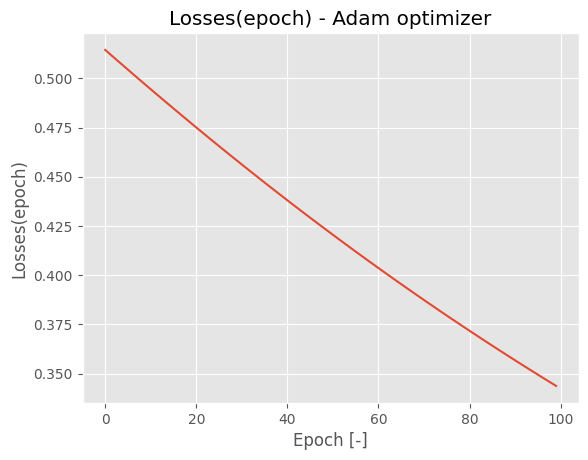

Text(0.5, 1.0, 'Salary(age) - Adam optimizer')

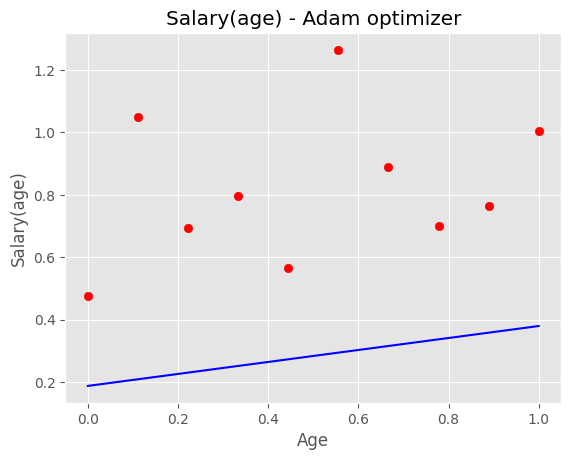

In [4]:
plt.style.use("ggplot")
plt.plot(range(len(losses)), losses)
plt.grid(True)
plt.title("Losses(epoch) - Adam optimizer")
plt.xlabel("Epoch [-]")
plt.ylabel("Losses(epoch)")
plt.show()


plt.style.use("ggplot")
plt.scatter(X, y, color="red")
plt.grid(True)
plt.plot(X.numpy(), model(X).detach(), color="blue")
plt.xlabel("Age")
plt.ylabel("Salary(age)")
plt.title("Salary(age) - Adam optimizer")